In [19]:
import numpy as np

import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [20]:


## 输入层
inChans = 3 # RGB

##输出层
outChans =25 

# 卷积核大小
krnSize =5
stride=1
padding =0

# create the instance (cf nn.Linear)
c = nn.Conv2d(inChans,outChans,krnSize,stride,padding)

print(c)

print(c.weight)
print(c.weight[1,0,:,:])

Conv2d(3, 25, kernel_size=(5, 5), stride=(1, 1))
Parameter containing:
tensor([[[[ 0.0250, -0.0220,  0.0910,  0.0476,  0.0786],
          [ 0.1023, -0.0048, -0.0183,  0.0170, -0.0220],
          [ 0.0600, -0.0770, -0.0324,  0.1126,  0.0677],
          [ 0.0448, -0.0309,  0.0300,  0.0130, -0.0600],
          [-0.0211, -0.0574, -0.0905,  0.0828,  0.0771]],

         [[-0.0612, -0.1034, -0.0903, -0.0186,  0.0686],
          [-0.0858, -0.1064, -0.0083,  0.0406, -0.0399],
          [ 0.0658, -0.0901, -0.0791,  0.0238, -0.0847],
          [-0.0012,  0.0801, -0.1141, -0.0394,  0.0292],
          [ 0.0575,  0.0159,  0.0354,  0.0011,  0.0955]],

         [[-0.1153,  0.0003,  0.0818, -0.0763, -0.0349],
          [-0.0433, -0.0833,  0.0696,  0.1114, -0.0938],
          [-0.0225,  0.1032, -0.0349, -0.0429,  0.1110],
          [-0.1047,  0.0188,  0.0585,  0.0896,  0.0177],
          [ 0.1051, -0.0661, -0.0399, -0.1065,  0.1122]]],


        [[[ 0.0242,  0.0156,  0.0886,  0.0191, -0.0366],
         

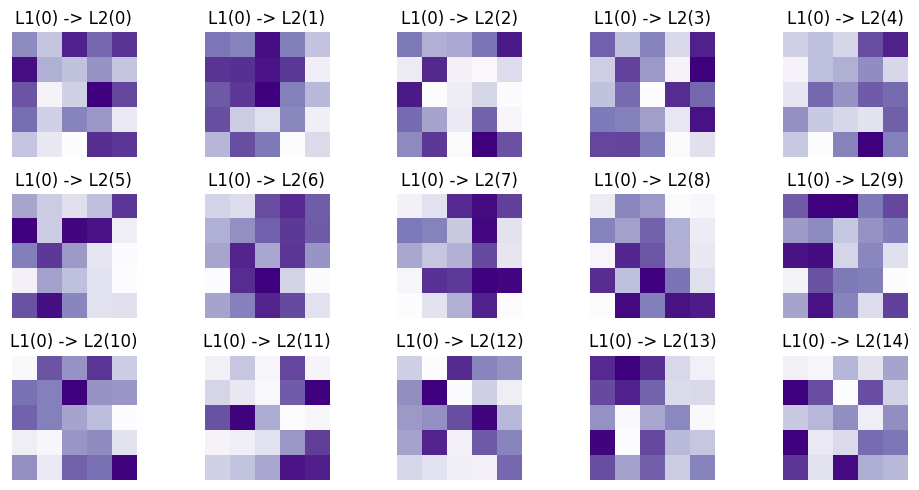

In [21]:
# what do these kernels look like?

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i ,ax in enumerate(axs.flatten()):
    
    ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(),cmap='Purples')
    ax.set_title('L1(0) -> L2(%s)'%i)
    ax.axis('off')

plt.tight_layout()
plt.show()

# 对图片进行卷积




imsize = (1,3,64,64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


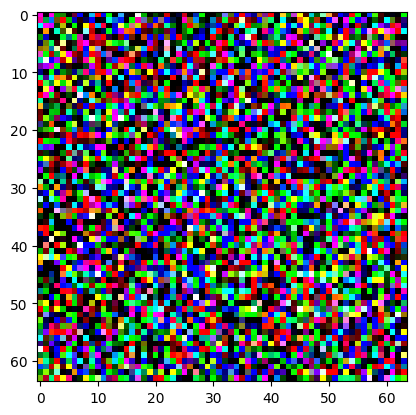

In [22]:
imsize =(1,3,64,64)

img = torch.randn(imsize)

img2view = img.permute(2,3,1,0).numpy()

plt.imshow(np.squeeze(img2view))


In [23]:

conv_res = c(img)

print(img.shape)
conv_res.shape

torch.Size([1, 3, 64, 64])


torch.Size([1, 25, 60, 60])

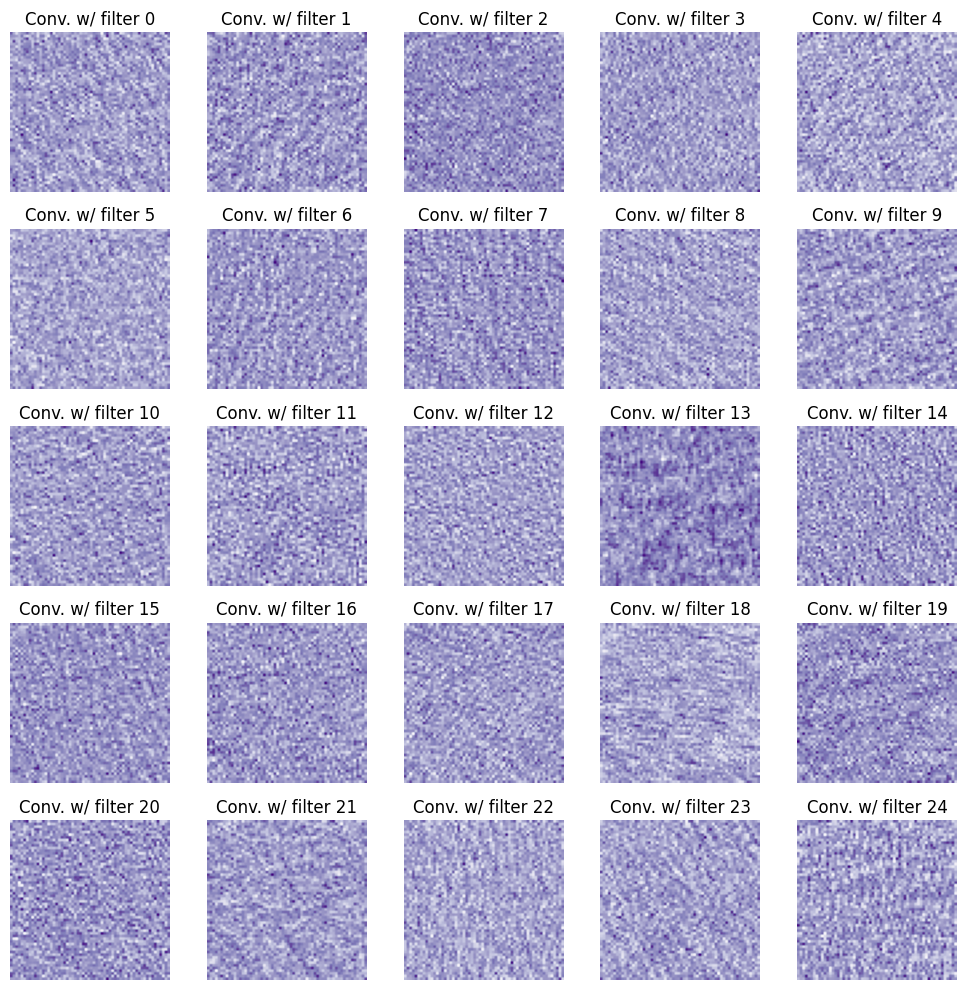

In [24]:
fig,axs = plt.subplots(5,5,figsize=(10,10))

## 遍历查看每一种卷积后的特征图
for i ,ax in enumerate(axs.flatten()):
    I  = torch.squeeze(conv_res[0,i,:,:]).detach()

    ax.imshow(I,cmap='Purples')
    ax.set_title('Conv. w/ filter %s'%i)
    ax.axis('off')


plt.tight_layout()

plt.show()
    